#### Breast Cancer detection with SVM

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r'C:\Users\vedant\Downloads\data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df = df.dropna(axis=1, how='all')

In [6]:
df['diagnostics'] = df['diagnosis'].map({'M': 1, 'B': 0})
df = df.drop(columns=['diagnosis'])

In [10]:
X = df.drop(['diagnostics', 'id'], axis=1)
y = df['diagnostics']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Accuracy

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM with Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f'Linear SVM Accuracy: {accuracy_linear:.4f}')

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'RBF SVM Accuracy: {accuracy_rbf:.4f}')

Linear SVM Accuracy: 0.9649
RBF SVM Accuracy: 0.9737


#### Decision boundary

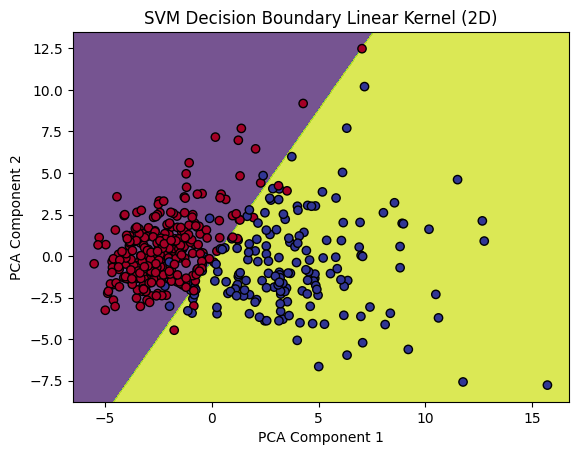

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dataset to 2D using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data (you can try both Linear and RBF kernel here)
svm = SVC(kernel='linear', random_state=42)  # or 'rbf' for RBF kernel
svm.fit(X_train_2d, y_train)

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title('SVM Decision Boundary Linear Kernel (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


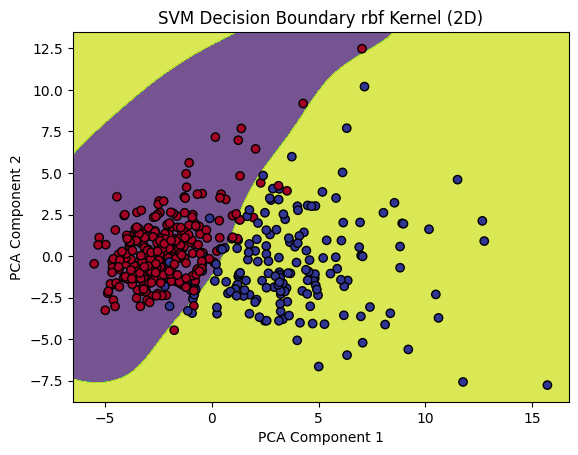

In [21]:
svm = SVC(kernel='rbf', random_state=42)  # or 'rbf' for RBF kernel
svm.fit(X_train_2d, y_train)

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title('SVM Decision Boundary rbf Kernel (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


#### Hyperparameter tuning 

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']}

# Perform Grid Search for both Linear and RBF kernels
svm_rbf = SVC(kernel='rbf', random_state=42)
grid_search_rbf = GridSearchCV(svm_rbf, param_grid, cv=5, verbose=1)
grid_search_rbf.fit(X_train, y_train)

# Best hyperparameters
print(f'Best hyperparameters for RBF SVM: {grid_search_rbf.best_params_}')

# Train with the best parameters
best_svm_rbf = grid_search_rbf.best_estimator_
y_pred_best_rbf = best_svm_rbf.predict(X_test)
accuracy_best_rbf = accuracy_score(y_test, y_pred_best_rbf)
print(f'RBF SVM with tuned hyperparameters Accuracy: {accuracy_best_rbf:.4f}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters for RBF SVM: {'C': 1, 'gamma': 'scale'}
RBF SVM with tuned hyperparameters Accuracy: 0.9737


In [23]:
# Define the parameter grid for tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']}

# Perform Grid Search for both Linear and RBF kernels
svm_linear = SVC(kernel='linear', random_state=42)
grid_search_linear = GridSearchCV(svm_linear, param_grid, cv=5, verbose=1)
grid_search_linear.fit(X_train, y_train)

# Best hyperparameters
print(f'Best hyperparameters for linear SVM: {grid_search_linear.best_params_}')

# Train with the best parameters
best_svm_linear = grid_search_linear.best_estimator_
y_pred_best_linear = best_svm_linear.predict(X_test)
accuracy_best_linear = accuracy_score(y_test, y_pred_best_linear)
print(f'Linear SVM with tuned hyperparameters Accuracy: {accuracy_best_linear:.4f}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters for linear SVM: {'C': 0.1, 'gamma': 0.001}
Linear SVM with tuned hyperparameters Accuracy: 0.9825


#### Cross-validation score

In [24]:
from sklearn.model_selection import cross_val_score
# Cross-validation for RBF SVM (with best parameters from GridSearchCV)
cross_val_scores_rbf = cross_val_score(best_svm_rbf, X_train, y_train, cv=5)
print(f'Cross-validation scores for RBF SVM: {cross_val_scores_rbf}')
print(f'Mean cross-validation score: {cross_val_scores_rbf.mean():.4f}')

Cross-validation scores for RBF SVM: [0.96703297 1.         0.96703297 0.96703297 0.97802198]
Mean cross-validation score: 0.9758


In [26]:
from sklearn.model_selection import cross_val_score
# Cross-validation for linear SVM (with best parameters from GridSearchCV)
cross_val_scores_linear = cross_val_score(best_svm_linear, X_train, y_train, cv=5)
print(f'Cross-validation scores for linear SVM: {cross_val_scores_linear}')
print(f'Mean cross-validation score: {cross_val_scores_linear.mean():.4f}')

Cross-validation scores for linear SVM: [0.96703297 1.         0.95604396 0.96703297 0.95604396]
Mean cross-validation score: 0.9692
